In [1]:
import sys
sys.path.append("../src")

In [2]:
import os
from glob import glob

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
from copy import deepcopy

In [56]:
import pickle

In [34]:
import torch

In [34]:
import torch

In [3]:
keywords = {
    "train loss": "train_loss.npy",
    "train top1 accuracy": "train_acc1.npy",
    "train top5 accuracy": "train_acc5.npy",
    "validation loss": "test_loss.npy",
    "validation top1 accuracy": "test_acc1.npy",
    "validation top5 accuracy": "test_acc5.npy",
}

In [34]:
import torch

In [7]:
datas = {
    "PlainNet": get_datas("/data2/genta/resnet/20200409_plainnet34_imagenet/"),
    "ResNet": get_datas("/data2/genta/resnet/20200409_resnet34_imagenet/"),
}

In [8]:
n_epochs = 90

In [9]:
def plot_helper(data, n_dim=n_epochs, **kwargs):
    plt.plot(data.reshape(n_dim, -1).mean(-1), **kwargs)

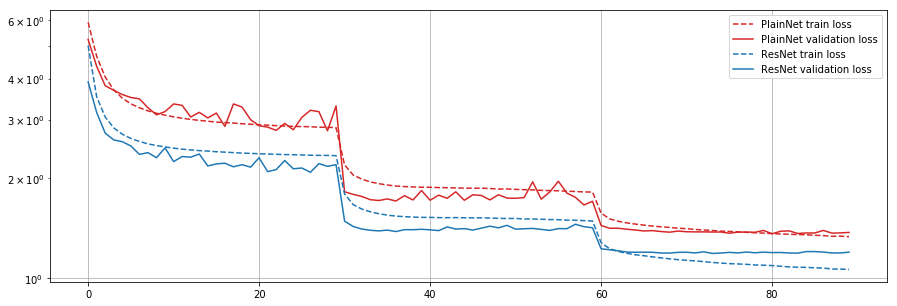

In [10]:
mode_types = [
    "train",
    "validation"
]

colors = {
    "PlainNet": "tab:red",
    "ResNet": "tab:blue"
}

linestyles = {
    mode_types[0]: "--",
    mode_types[1]: "-",
}

plt.figure(figsize=(15, 5))
data_type = "loss"
for net_type, tmp_data in datas.items():
    for mode_type in mode_types:
        key = "{} {}".format(mode_type, data_type)
        label = "{} {} {}".format(net_type, mode_type, data_type)
        plot_helper(tmp_data[key], label=label, linestyle=linestyles[mode_type], color=colors[net_type])
plt.grid()
plt.legend()
plt.yscale("log")
plt.show()

In [11]:
datas = {
    "ResNet": get_datas("/data2/genta/resnet/20200409_resnet34_imagenet/"),
    "PlainNet": get_datas("/data2/genta/resnet/20200409_plainnet34_imagenet/"),
    
    "ResNet-1": get_datas("/data2/genta/resnet/resnet34_my_training"),
    "PlainNet-1": get_datas("/data2/genta/resnet/resnet34_plain_training"),
    
    "ResNet-2": get_datas("/data2/genta/resnet/resnet34_my_training_20200115/"),
    "PlainNet-2": get_datas("/data2/genta/resnet/resnet34_plain_training_20200124/"),
    
    "ResNet-3": get_datas("/data2/genta/resnet/resnet34_my_training_20200120//"),
    "PlainNet-3": get_datas("/data2/genta/resnet/20200814_plainnet34-imagenet/"),
}

/data2/genta/resnet/resnet34_my_training train top1 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_my_training train top5 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_my_training validation top1 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_my_training validation top5 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_plain_training train top1 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_plain_training train top5 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_plain_training validation top1 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_plain_training validation top5 accuracy Object arrays cannot be loaded when allow_pickle=False
/data2/genta/resnet/resnet34_my_training

In [41]:
def _to_numpy(_src):
    ds = []
    for d in _src:
        ds.append(d.to("cpu").detach().numpy())
    return np.asarray(ds)
    

In [51]:
for net_type, tmp_data in datas.items():
    for key, item in tmp_data.items():
        if item.dtype == np.dtype("O"):
            tmp_data[key] = _to_numpy(item)

In [54]:
out_dir = "20201226"
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [60]:
with open(os.path.join(out_dir, "datas.pkl"), "wb") as f:
    pickle.dump(datas, f)


In [154]:
mode_types = [
    "train",
    "validation"
]

colors = {
    "PlainNet": "xkcd:red",
    "ResNet": "xkcd:blue",
    "PlainNet-1": "xkcd:magenta",
    "ResNet-1": "xkcd:teal",
    "PlainNet-2": "xkcd:coral",
    "ResNet-2": "xkcd:aqua",
    "PlainNet-3": "xkcd:crimson",
    "ResNet-3": "xkcd:darkblue",
}

linestyles = {
    mode_types[0]: "--",
    mode_types[1]: "-",
}
ylabels = {
    "loss": "Loss value",
    "top1 accuracy": "Top1 accuracy rate [%]",
    "top5 accuracy": "Top5 accuracy rate [%]",
} 

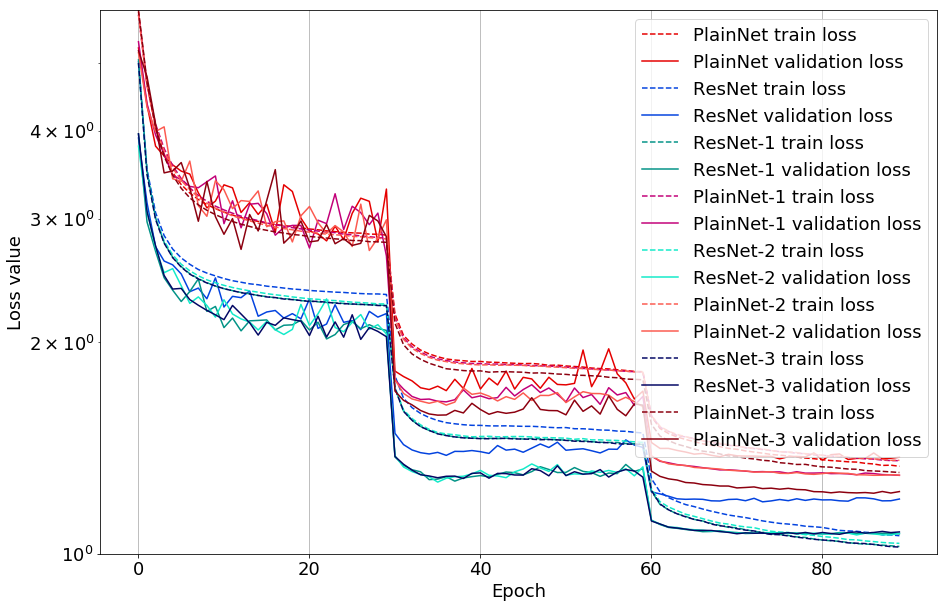

In [155]:

vmin = 1
vmax = -1
plt.figure(figsize=(15, 10))
data_type = "loss"
for net_type, tmp_data in datas.items():
    for mode_type in mode_types:
        key = "{} {}".format(mode_type, data_type)
        label = "{} {} {}".format(net_type, mode_type, data_type)
        plot_helper(tmp_data[key], label=label, linestyle=linestyles[mode_type], color=colors[net_type])
        _vmin = tmp_data[key].reshape(n_epochs, -1).mean(-1).min()
        _vmax = tmp_data[key].reshape(n_epochs, -1).mean(-1).max()
        if vmax < _vmax:
            vmax = _vmax
        if vmin > _vmin:
            vmin = _vmin
        
plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg)
plt.xlabel("Epoch")
plt.yscale("log")
plt.ylim(vmin, vmax)
plt.show()

In [93]:
def between_std_helper(data, n_dim=n_epochs, alpha=0.4, label="", **kwargs):
    src_data = data.reshape(len(data), n_dim, -1).mean(-1)
    vmean = src_data.mean(0)
    vstd = src_data.std(0)
    plt.plot(vmean, label=label, **kwargs)
    plt.fill_between(np.arange(n_epochs), vmean - vstd, vmean + vstd, alpha=alpha, **kwargs)
    
def between_percent_helper(data, n_dim=n_epochs, alpha=0.4, label="", **kwargs):
    src_data = data.reshape(len(data), n_dim, -1).mean(-1)
    v25 = np.percentile(src_data, 25, axis=0)
    v50 = np.percentile(src_data, 50, axis=0)
    v75 = np.percentile(src_data, 75, axis=0)
    plt.plot(v50, label=label, **kwargs)
    plt.fill_between(np.arange(n_epochs), v25, v75, alpha=alpha, **kwargs)

In [132]:
colors_modetype = {
    "PlainNet train": "xkcd:maroon",
    "ResNet train": "xkcd:navy",
    "PlainNet validation": "xkcd:red",
    "ResNet validation": "xkcd:blue",
}

In [149]:
plt.rcParams["font.size"] = 18
largefontsize = 24
ticks = np.concatenate(((0,), np.arange(9, n_epochs, 10)))
labels = np.concatenate(((1,), np.arange(10, n_epochs + 1, 10)))
figsize = (15, 10)

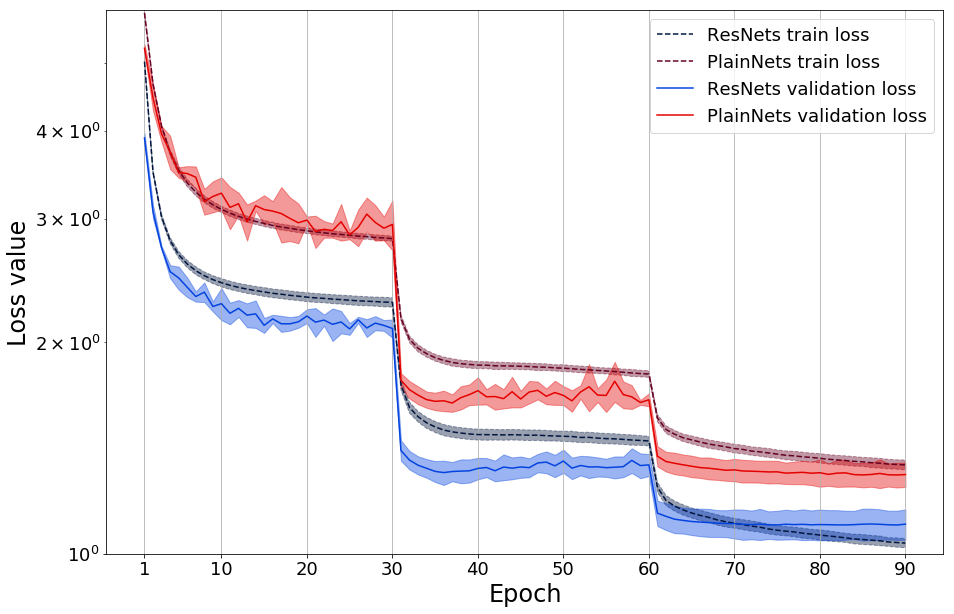

In [161]:


plt.figure(figsize=figsize)
data_type = "loss"
for mode_type in mode_types:
    key = "{} {}".format(mode_type, data_type)
    tmp_data = []
    for net_type in ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "ResNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

    tmp_data = []
    for net_type in ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "PlainNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.yscale("log")
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(vmin, vmax)
plt.show()

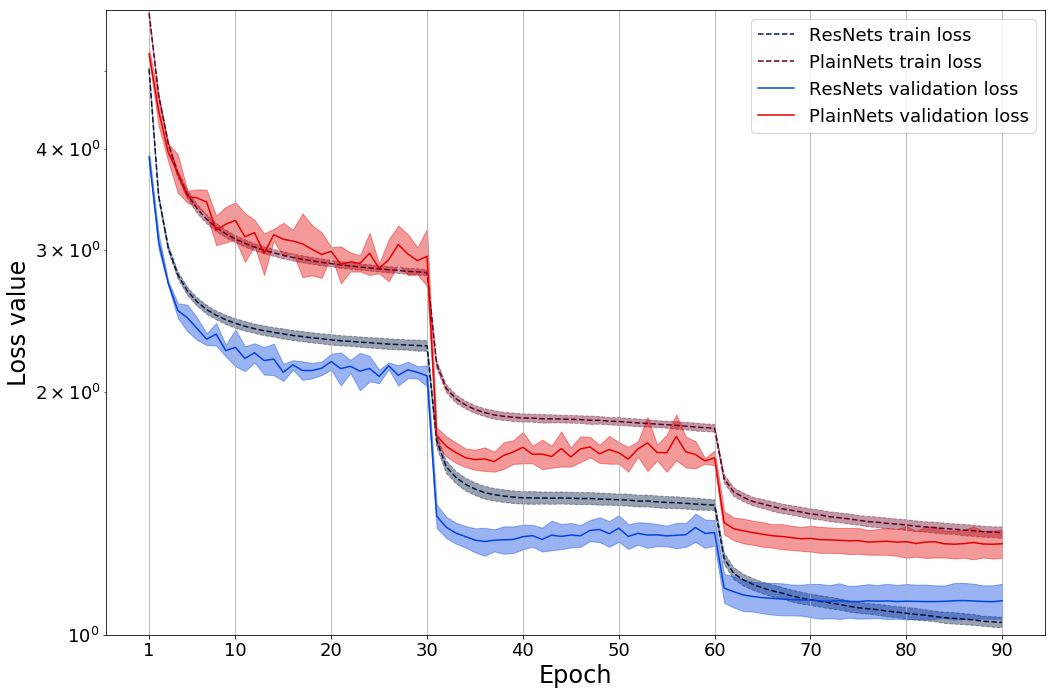

In [162]:


plt.figure(figsize=figsize)
data_type = "loss"
for mode_type in mode_types:
    key = "{} {}".format(mode_type, data_type)
    tmp_data = []
    for net_type in ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "ResNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

    tmp_data = []
    for net_type in ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "PlainNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.yscale("log")
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(vmin, vmax)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "std", "log", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

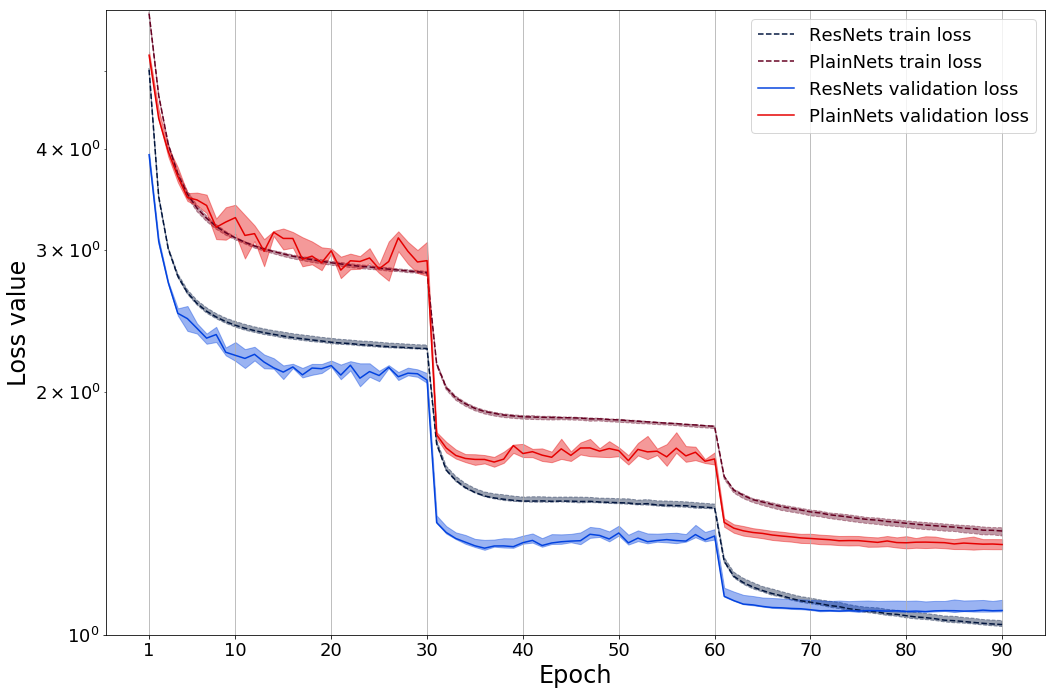

In [163]:


plt.figure(figsize=figsize)
data_type = "loss"
for mode_type in mode_types:
    key = "{} {}".format(mode_type, data_type)
    tmp_data = []
    for net_type in ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "ResNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_percent_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

    tmp_data = []
    for net_type in ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "PlainNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_percent_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.yscale("log")
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(vmin, vmax)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "percenttile", "log", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

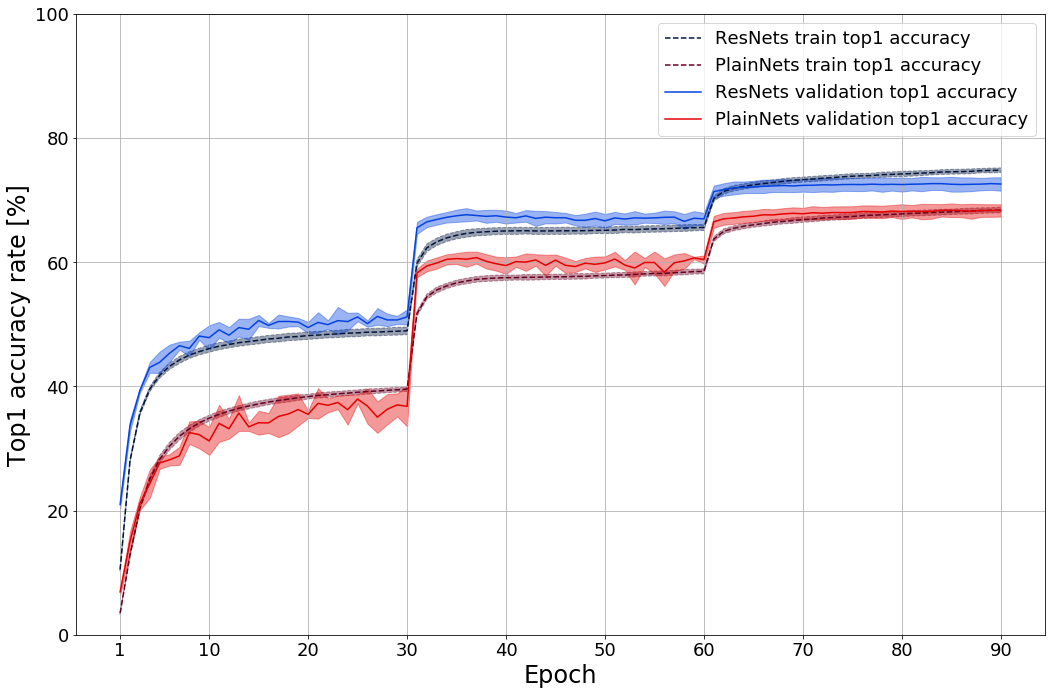

In [164]:


plt.figure(figsize=figsize)
data_type = "top1 accuracy"
for mode_type in mode_types:
    key = "{} {}".format(mode_type, data_type)
    tmp_data = []
    for net_type in ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "ResNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

    tmp_data = []
    for net_type in ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "PlainNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(0, 100)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "std", "linear", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

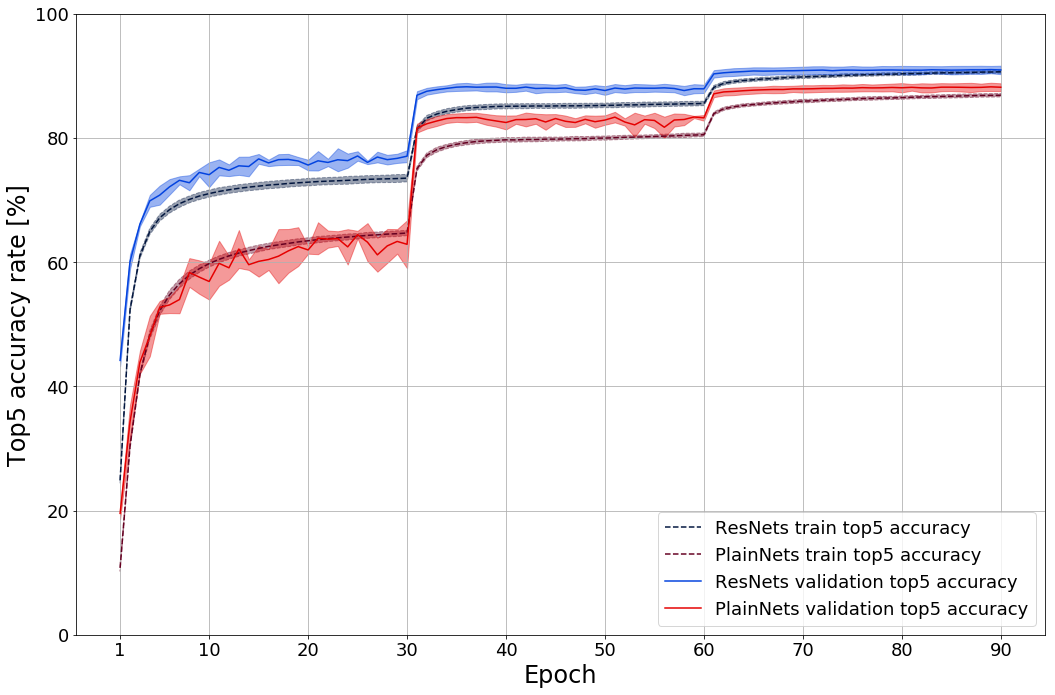

In [165]:


plt.figure(figsize=figsize)
data_type = "top5 accuracy"
for mode_type in mode_types:
    key = "{} {}".format(mode_type, data_type)
    tmp_data = []
    for net_type in ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "ResNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

    tmp_data = []
    for net_type in ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",):
        tmp_data.append(datas[net_type][key])
    net_type = "PlainNet"
    label = "{}s {} {}".format(net_type, mode_type, data_type)
    color_key = "{} {}".format(net_type, mode_type)
    between_std_helper(np.asarray(tmp_data), label=label, linestyle=linestyles[mode_type], color=colors_modetype[color_key])

plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.xticks(ticks=ticks, labels=labels)
plt.ylim(0, 100)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "std", "linear", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

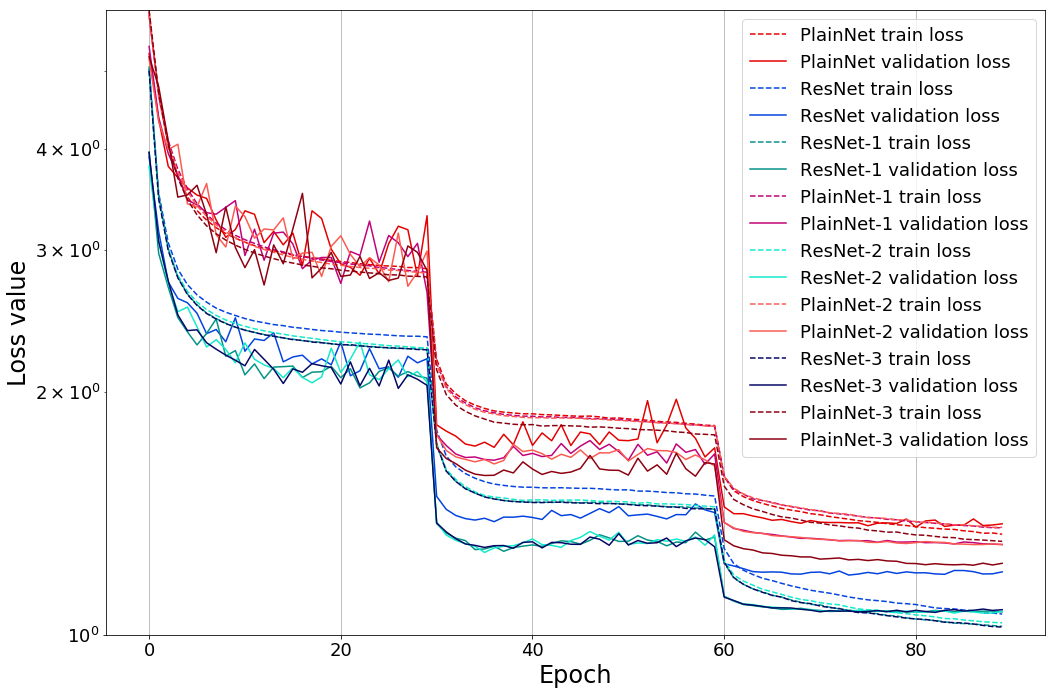

In [156]:

plt.figure(figsize=figsize)
data_type = "loss"
for net_type, tmp_data in datas.items():
    for mode_type in mode_types:
        key = "{} {}".format(mode_type, data_type)
        label = "{} {} {}".format(net_type, mode_type, data_type)
        plot_helper(tmp_data[key], label=label, linestyle=linestyles[mode_type], color=colors[net_type])
        
plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg, fontsize=largefontsize)
plt.xlabel("Epoch", fontsize=largefontsize)
plt.yscale("log")
plt.ylim(vmin, vmax)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "each", "log", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

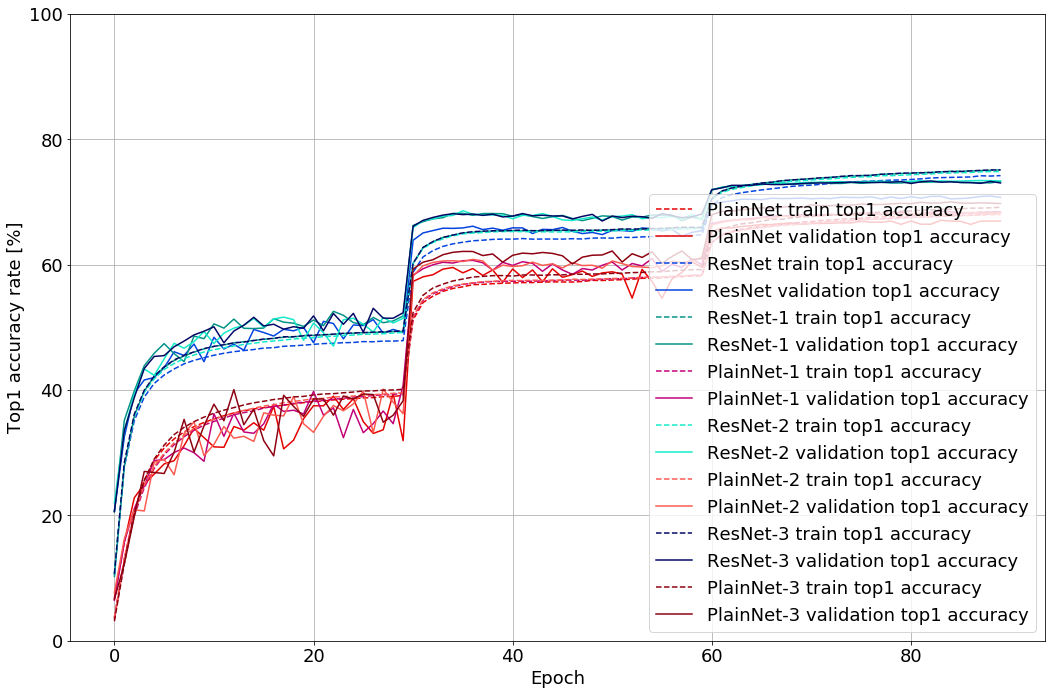

In [157]:

plt.figure(figsize=figsize)
data_type = "top1 accuracy"
for net_type, tmp_data in datas.items():
    for mode_type in mode_types:
        key = "{} {}".format(mode_type, data_type)
        label = "{} {} {}".format(net_type, mode_type, data_type)
        plot_helper(tmp_data[key], label=label, linestyle=linestyles[mode_type], color=colors[net_type])
        
plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg)
plt.xlabel("Epoch")
plt.ylim(0, 100)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "each", "linear", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

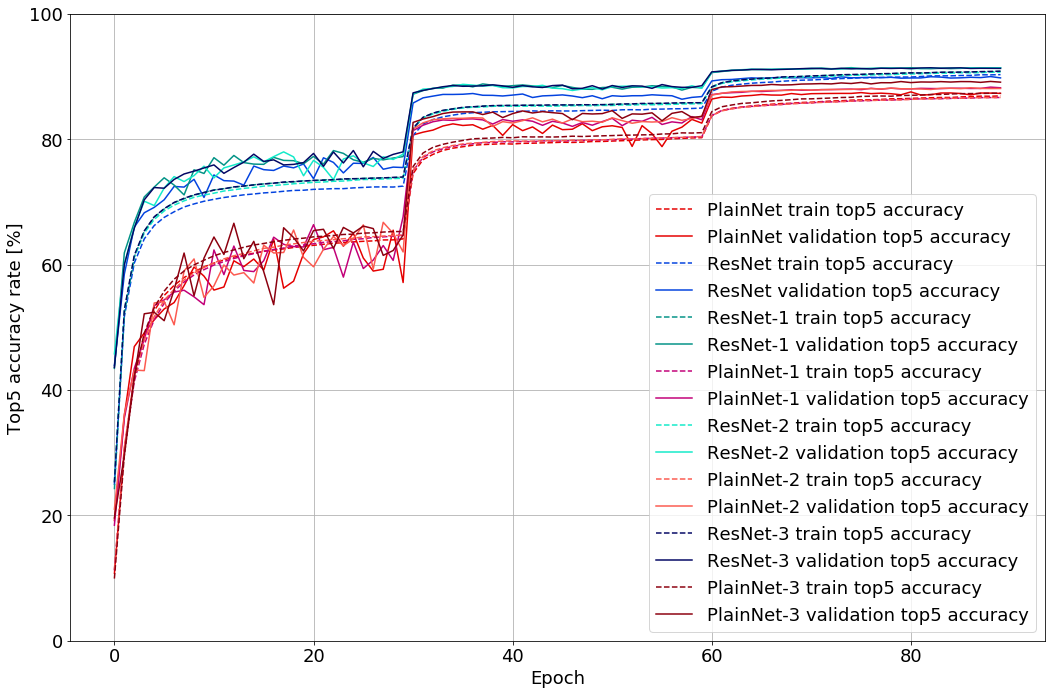

In [158]:

plt.figure(figsize=figsize)
data_type = "top5 accuracy"
for net_type, tmp_data in datas.items():
    for mode_type in mode_types:
        key = "{} {}".format(mode_type, data_type)
        label = "{} {} {}".format(net_type, mode_type, data_type)
        plot_helper(tmp_data[key], label=label, linestyle=linestyles[mode_type], color=colors[net_type])
        
plt.grid()
plt.legend()
msg = ylabels[data_type]
plt.ylabel(msg)
plt.xlabel("Epoch")
plt.ylim(0, 100)
plt.tight_layout()
for ext in ("svg", "png", "pdf"):
    fname = "{}-{}-{}.{}".format(data_type, "each", "linear", ext)
    out_path = os.path.join(out_dir, fname)
    plt.savefig(out_path, transparent=True)
plt.show()

In [170]:
datas["ResNet"]["train loss"].reshape(n_epochs, -1).mean(-1)[-1]

1.061072282703011

In [175]:
def get_data_groupbynet(arch, key):
    tmp_data = []
    if arch.upper() == "PLAINNET":
        net_types = ("PlainNet", "PlainNet-1", "PlainNet-2", "PlainNet-3",)
    elif arch.upper() == "RESNET":
        net_types = ("ResNet", "ResNet-1", "ResNet-2", "ResNet-3",)
    for net_type in net_types:
        tmp_data.append(datas[net_type][key])
    return np.asarray(tmp_data)

In [178]:
data_types = ("loss", "top1 accuracy", "top5 accuracy")
archs = ("ResNet", "PlainNet")

In [185]:
groupdatas = {}
for d_type in data_types:
    for m_type in mode_types:
        for arch in archs:
            key = "{} {}".format(m_type, d_type)
            g_key = "{} {}".format(arch, key)
            groupdatas[g_key] = get_data_groupbynet(arch, key).reshape(4, n_epochs, -1)

In [187]:
groupdatas["ResNet train loss"].shape

(4, 90, 5005)

In [188]:
import pandas as pd

In [222]:
data_max_len = 8
mode_max_len = 3
data = []
index = archs
md_types = ["{} {}".format(m, d) for d in data_types for m in mode_types]
for _index in index:
    tmp_data = []
    for md_type in md_types:
        key = "{} {}".format(_index, md_type)
        value = groupdatas[key].mean(-1)[:, -1]
        tmp_data.append(value.mean())
        tmp_data.append(value.std())
    data.append(tmp_data)
columns = ["{}. {}. {}".format(m[:mode_max_len], d[:data_max_len], s) for d in data_types for m in mode_types for s in ("mean", "std")]
final_performances_table = pd.DataFrame(data, index, columns)

In [223]:
final_performances_table

,tra. loss. mean,tra. loss. std,val. loss. mean,val. loss. std,tra. top1 acc. mean,tra. top1 acc. std,val. top1 acc. mean,val. top1 acc. std,tra. top5 acc. mean,tra. top5 acc. std,val. top5 acc. mean,val. top5 acc. std
ResNet,1.035683,0.015401,1.101982,0.054718,74.796067,0.373030,72.576730,1.084530,90.648163,0.220370,90.943678,0.683803
PlainNet,1.338369,0.021662,1.296558,0.051796,68.383775,0.464543,68.317622,0.992247,86.871965,0.281179,88.157685,0.633984


In [233]:
print(final_performances_table.to_latex(float_format="{:.4}".format))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &  tra. loss. mean &  tra. loss. std &  val. loss. mean &  val. loss. std &  tra. top1 acc. mean &  tra. top1 acc. std &  val. top1 acc. mean &  val. top1 acc. std &  tra. top5 acc. mean &  tra. top5 acc. std &  val. top5 acc. mean &  val. top5 acc. std \\
\midrule
ResNet   &            1.036 &          0.0154 &            1.102 &         0.05472 &                 74.8 &               0.373 &                72.58 &               1.085 &                90.65 &              0.2204 &                90.94 &              0.6838 \\
PlainNet &            1.338 &         0.02166 &            1.297 &          0.0518 &                68.38 &              0.4645 &                68.32 &              0.9922 &                86.87 &              0.2812 &                88.16 &               0.634 \\
\bottomrule
\end{tabular}



In [234]:
multi_columns = [("{}. {}.".format(m[:mode_max_len], d[:data_max_len]), s) for d in data_types for m in mode_types for s in ("mean", "std")]
final_performances_table.columns = pd.MultiIndex.from_tuples(multi_columns)

In [235]:
final_performances_table

tra. loss.           val. loss.           tra. top1 acc.            \
               mean       std       mean       std           mean       std   
ResNet     1.035683  0.015401   1.101982  0.054718      74.796067  0.373030   
PlainNet   1.338369  0.021662   1.296558  0.051796      68.383775  0.464543   

         val. top1 acc.           tra. top5 acc.           val. top5 acc.  \
                   mean       std           mean       std           mean   
ResNet        72.576730  1.084530      90.648163  0.220370      90.943678   
PlainNet      68.317622  0.992247      86.871965  0.281179      88.157685   

                    
               std  
ResNet    0.683803  
PlainNet  0.633984

In [236]:
out_path = os.path.join(out_dir, "final_performances_table.df.pkl")
final_performances_table.to_pickle(out_path)

In [238]:
print(final_performances_table.to_latex(float_format="{:.4}".format))

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{tra. loss.} & \multicolumn{2}{l}{val. loss.} & \multicolumn{2}{l}{tra. top1 acc.} & \multicolumn{2}{l}{val. top1 acc.} & \multicolumn{2}{l}{tra. top5 acc.} & \multicolumn{2}{l}{val. top5 acc.} \\
{} &       mean &     std &       mean &     std &           mean &    std &           mean &    std &           mean &    std &           mean &    std \\
\midrule
ResNet   &      1.036 &  0.0154 &      1.102 & 0.05472 &           74.8 &  0.373 &          72.58 &  1.085 &          90.65 & 0.2204 &          90.94 & 0.6838 \\
PlainNet &      1.338 & 0.02166 &      1.297 &  0.0518 &          68.38 & 0.4645 &          68.32 & 0.9922 &          86.87 & 0.2812 &          88.16 &  0.634 \\
\bottomrule
\end{tabular}



In [240]:
final_performances_table

tra. loss.           val. loss.           tra. top1 acc.            \
               mean       std       mean       std           mean       std   
ResNet     1.035683  0.015401   1.101982  0.054718      74.796067  0.373030   
PlainNet   1.338369  0.021662   1.296558  0.051796      68.383775  0.464543   

         val. top1 acc.           tra. top5 acc.           val. top5 acc.  \
                   mean       std           mean       std           mean   
ResNet        72.576730  1.084530      90.648163  0.220370      90.943678   
PlainNet      68.317622  0.992247      86.871965  0.281179      88.157685   

                    
               std  
ResNet    0.683803  
PlainNet  0.633984

In [242]:
show_columns = [(i, j) for i in ("tra. loss.", "val. loss.", "tra. top1 acc.", "val. top1 acc.") for j in ("mean", "std")]
print(final_performances_table.to_latex(columns=show_columns, float_format="{:.4}".format))

\begin{tabular}{lrrrrrrrr}
\toprule
{} & \multicolumn{2}{l}{tra. loss.} & \multicolumn{2}{l}{val. loss.} & \multicolumn{2}{l}{tra. top1 acc.} & \multicolumn{2}{l}{val. top1 acc.} \\
{} &       mean &     std &       mean &     std &           mean &    std &           mean &    std \\
\midrule
ResNet   &      1.036 &  0.0154 &      1.102 & 0.05472 &           74.8 &  0.373 &          72.58 &  1.085 \\
PlainNet &      1.338 & 0.02166 &      1.297 &  0.0518 &          68.38 & 0.4645 &          68.32 & 0.9922 \\
\bottomrule
\end{tabular}



In [202]:
"{:<2}".format("hogehoge")

'hogehoge'